In [53]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df = df[["sex", "pclass", "age", "fare", "survived"]]

df = df.dropna()# Remove missing values
display(df)

,sex,pclass,age,fare,survived
0,male,3,22.0,7.2500,0
1,female,1,38.0,71.2833,1
2,female,3,26.0,7.9250,1
3,female,1,35.0,53.1000,1
4,male,3,35.0,8.0500,0
...,...,...,...,...,...
885,female,3,39.0,29.1250,0
886,male,2,27.0,13.0000,0
887,female,1,19.0,30.0000,1
889,male,1,26.0,30.0000,1


In [54]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
X = df.drop("survived", axis=1)
y = df["survived"]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

print(f'\nMy model correctly predicted whether a passenger survived about %{round(accuracy * 100, 2)} times on unseen test data.')

Accuracy: 75.52 %

My model correctly predicted whether a passenger survived about %75.52 times on unseen test data.


In [81]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n   TN FP\n", cm)
print("   FN TP")

print("\n TN: Model correctly predicted someone didn’t survive \n TP: Model correctly predicted someone survived \n FN: Model redicted someone didn’t survive, but they did \n FP: Model predicted someone survived, but they didn’t")


Confusion Matrix:
   TN FP
 [[68 19]
 [16 40]]
   FN TP

 TN: Model correctly predicted someone didn’t survive 
 TP: Model correctly predicted someone survived 
 FN: Model redicted someone didn’t survive, but they did 
 FP: Model predicted someone survived, but they didn’t


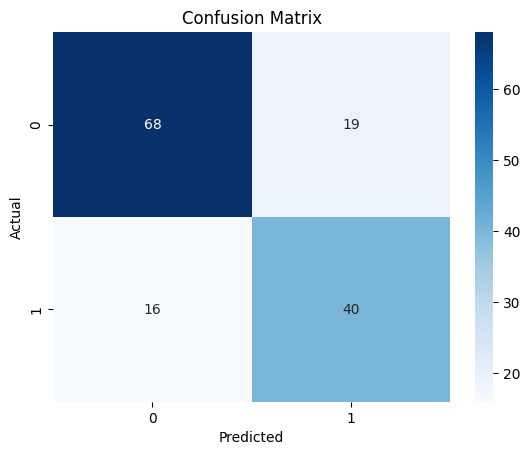

In [59]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [89]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Precision of model: %{round(precision * 100, 2)}\nRecall of model: %{round(recall * 100, 2)}')

Precision of model: %67.8
Recall of model: %71.43
